In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def plot_swarmplot(file_path):
    # 读取CSV文件
    data = pd.read_csv(file_path)
    
    # 查看数据结构
    print("原始数据形状:", data.shape)
    print("列名:", data.columns.tolist())
    print("\n前几行数据:")
    print(data.head())
    
    # 数据清洗和重塑
    # 创建空的数据框来存储处理后的数据
    processed_data = []
    
    # 遍历每一行（每个算法）
    for index, row in data.iterrows():
        algorithm_name = row['Algorithm']  # 算法名称
        
        # 获取该算法的所有测试数据（从第2列开始）
        test_values = row[1:].values
        
        # 将字符串转换为数值，处理'NaN'字符串
        numeric_values = []
        for val in test_values:
            if pd.isna(val) or val == '':
                continue
            try:
                # 尝试转换为浮点数
                num_val = float(val)
                numeric_values.append(num_val)
            except (ValueError, TypeError):
                # 如果是'NaN'字符串，跳过
                if str(val).upper() != 'NAN':
                    print(f"警告: 无法转换值 '{val}' 为数字，算法: {algorithm_name}")
                continue
        
        # 为每个值创建记录
        for value in numeric_values:
            processed_data.append({
                'Algorithm': algorithm_name,
                'Steps': value
            })
    
    # 创建新的DataFrame
    df = pd.DataFrame(processed_data)
    
    print(f"\n处理后的数据形状: {df.shape}")
    print("\n各算法的数据量:")
    print(df['Algorithm'].value_counts())
    print("\n数据统计:")
    print(df.groupby('Algorithm')['Steps'].describe())
    
    # 设置绘图风格
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    
    # 创建swarmplot
    ax = sns.swarmplot(
        x='Algorithm', 
        y='Steps', 
        data=df,
        size=2,  # 点的大小
        alpha=0.7  # 透明度
    )
    
    # 添加箱线图显示中位数和四分位数
    sns.boxplot(
        x='Algorithm', 
        y='Steps', 
        data=df,
        width=0.3,
        boxprops={'alpha': 0.3},
        showfliers=False,  # 不显示异常值，因为swarmplot已经显示了
        ax=ax
    )
    
    # 美化图表
    plt.title('Swarm Plot of Steps by Search Algorithm', fontsize=16, fontweight='bold')
    plt.xlabel('Search Algorithm', fontsize=12)
    plt.ylabel('Number of Steps', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # 调整布局
    plt.tight_layout()
    
    # 显示图表
    plt.show()
    
    return df

原始数据形状: (4, 1002)
列名: ['Algorithm', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '

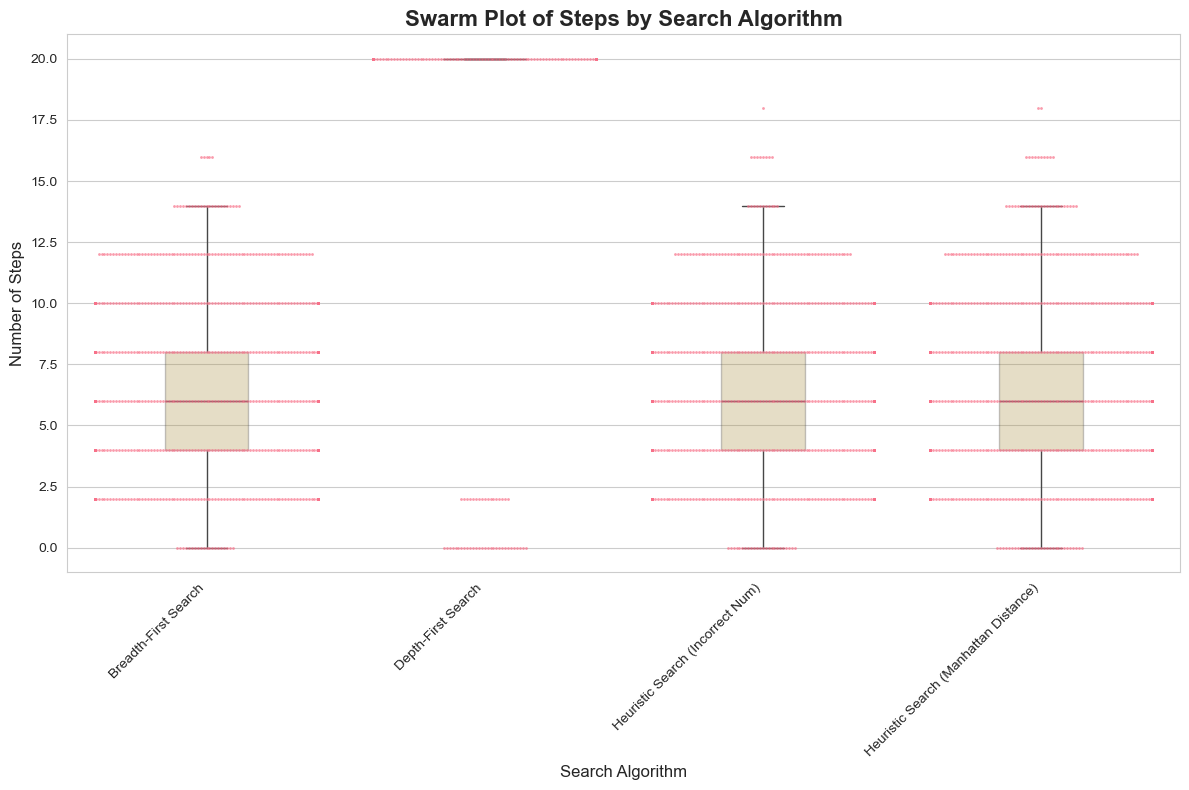

In [4]:
# 使用函数
file_path = "output.csv"  # 替换为你的CSV文件路径
df = plot_swarmplot(file_path)
df.to_csv("processed_output.csv", index=False)

In [5]:
def comprehensive_comparison(df):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. 箱线图
    sns.boxplot(x='Algorithm', y='Steps', data=df, ax=axes[0,0])
    axes[0,0].set_title('Box Plot')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. 小提琴图
    sns.violinplot(x='Algorithm', y='Steps', data=df, ax=axes[0,1])
    axes[0,1].set_title('Violin Plot')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. 蜂群图
    sns.swarmplot(x='Algorithm', y='Steps', data=df, ax=axes[0,2], size=2)
    axes[0,2].set_title('Swarm Plot')
    axes[0,2].tick_params(axis='x', rotation=45)
    
    # 4. KDE图
    for algo in df['Algorithm'].unique():
        algo_data = df[df['Algorithm'] == algo]['Steps']
        sns.kdeplot(algo_data, label=algo, ax=axes[1,0], fill=True, alpha=0.5)
    axes[1,0].set_title('KDE Plot')
    axes[1,0].legend()
    
    # 5. 直方图
    df.hist(column='Steps', by='Algorithm', ax=axes[1,1], bins=20)
    axes[1,1].set_title('Histograms by Algorithm')
    
    # 6. CDF图
    for algo in df['Algorithm'].unique():
        algo_data = df[df['Algorithm'] == algo]['Steps'].sort_values()
        y = np.arange(1, len(algo_data)+1) / len(algo_data)
        axes[1,2].plot(algo_data, y, label=algo)
    axes[1,2].set_title('CDF Plot')
    axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()

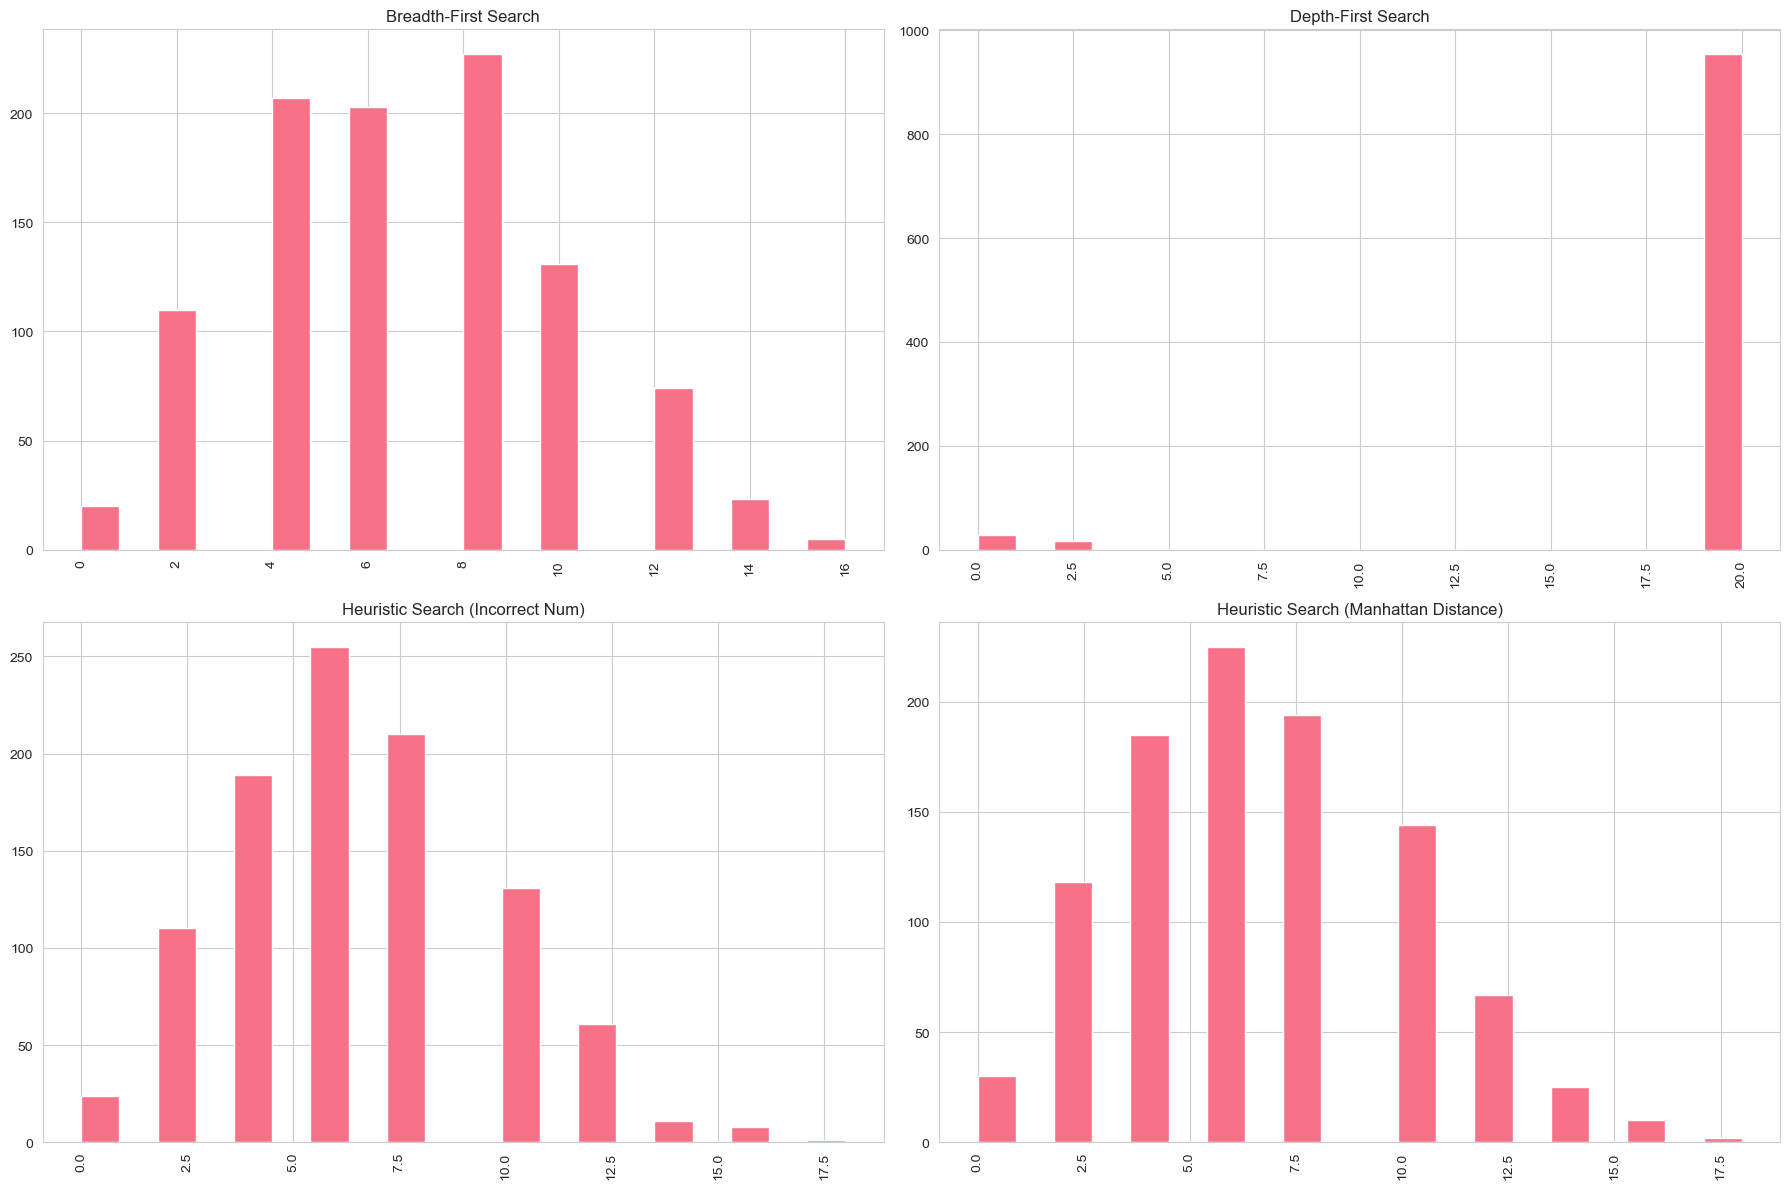

In [6]:
comprehensive_comparison(df)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
def plot_swarmplot(file_path):
    # 读取CSV文件
    data = pd.read_csv(file_path)
    
    # 查看数据结构
    print("原始数据形状:", data.shape)
    print("列名:", data.columns.tolist())
    print("\n前几行数据:")
    print(data.head())
    print("\n数据基本信息:")
    print(data.info())
    
    # 数据清洗 - 将Steps列转换为数值类型，'NaN'字符串转为真正的NaN
    data['Steps'] = pd.to_numeric(data['Steps'], errors='coerce')
    
    print(f"\n处理后的数据形状: {data.shape}")
    print("\n各算法的数据量:")
    print(data['Algorithm'].value_counts())
    print("\n步数统计:")
    print(data.groupby('Algorithm')['Steps'].describe())
    print("\n用时统计(微秒):")
    print(data.groupby('Algorithm')['Time_us'].describe())
    
    # 设置绘图风格
    plt.figure(figsize=(14, 10))
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    
    # 创建子图：步数分布和用时分布
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
    
    # 1. 步数的swarmplot
    sns.swarmplot(
        x='Algorithm', 
        y='Steps', 
        data=data,
        size=2,
        alpha=0.7,
        ax=ax1
    )
    # 添加箱线图
    sns.boxplot(
        x='Algorithm', 
        y='Steps', 
        data=data,
        width=0.3,
        boxprops={'alpha': 0.3},
        showfliers=False,
        ax=ax1
    )
    ax1.set_title('Swarm Plot of Steps by Search Algorithm', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Search Algorithm', fontsize=12)
    ax1.set_ylabel('Number of Steps', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. 用时的swarmplot
    sns.swarmplot(
        x='Algorithm', 
        y='Time_us', 
        data=data,
        size=2,
        alpha=0.7,
        ax=ax2
    )
    sns.boxplot(
        x='Algorithm', 
        y='Time_us', 
        data=data,
        width=0.3,
        boxprops={'alpha': 0.3},
        showfliers=False,
        ax=ax2
    )
    ax2.set_title('Swarm Plot of Execution Time by Search Algorithm', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Search Algorithm', fontsize=12)
    ax2.set_ylabel('Execution Time (microseconds)', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return data


In [3]:
def comprehensive_comparison(data):
    # 创建更全面的比较图表
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    
    # 数据预处理
    data['Steps'] = pd.to_numeric(data['Steps'], errors='coerce')
    
    # 1. 步数箱线图
    sns.boxplot(x='Algorithm', y='Steps', data=data, ax=axes[0,0])
    axes[0,0].set_title('Steps - Box Plot')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. 步数小提琴图
    sns.violinplot(x='Algorithm', y='Steps', data=data, ax=axes[0,1])
    axes[0,1].set_title('Steps - Violin Plot')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. 步数蜂群图
    sns.swarmplot(x='Algorithm', y='Steps', data=data, ax=axes[0,2], size=2)
    axes[0,2].set_title('Steps - Swarm Plot')
    axes[0,2].tick_params(axis='x', rotation=45)
    
    # 4. 用时箱线图
    sns.boxplot(x='Algorithm', y='Time_us', data=data, ax=axes[1,0])
    axes[1,0].set_title('Time - Box Plot (microseconds)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 5. 用时小提琴图
    sns.violinplot(x='Algorithm', y='Time_us', data=data, ax=axes[1,1])
    axes[1,1].set_title('Time - Violin Plot (microseconds)')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    # 6. 步数vs用时散点图
    for algo in data['Algorithm'].unique():
        algo_data = data[data['Algorithm'] == algo]
        axes[1,2].scatter(algo_data['Steps'], algo_data['Time_us'], label=algo, alpha=0.6)
    axes[1,2].set_title('Steps vs Execution Time')
    axes[1,2].set_xlabel('Steps')
    axes[1,2].set_ylabel('Time (microseconds)')
    axes[1,2].legend()
    
    # 7. 步数KDE图
    for algo in data['Algorithm'].unique():
        algo_data = data[data['Algorithm'] == algo]['Steps'].dropna()
        if len(algo_data) > 0:
            sns.kdeplot(algo_data, label=algo, ax=axes[2,0], fill=True, alpha=0.5)
    axes[2,0].set_title('Steps - KDE Plot')
    axes[2,0].legend()
    
    # 8. 用时KDE图
    for algo in data['Algorithm'].unique():
        algo_data = data[data['Algorithm'] == algo]['Time_us'].dropna()
        if len(algo_data) > 0:
            sns.kdeplot(algo_data, label=algo, ax=axes[2,1], fill=True, alpha=0.5)
    axes[2,1].set_title('Time - KDE Plot (microseconds)')
    axes[2,1].legend()
    
    # 9. 成功率统计
    success_rates = data.groupby('Algorithm')['Steps'].apply(
        lambda x: (x.notna().sum() / len(x)) * 100
    ).reset_index()
    success_rates.columns = ['Algorithm', 'SuccessRate']
    sns.barplot(x='Algorithm', y='SuccessRate', data=success_rates, ax=axes[2,2])
    axes[2,2].set_title('Success Rate by Algorithm (%)')
    axes[2,2].set_ylabel('Success Rate (%)')
    axes[2,2].tick_params(axis='x', rotation=45)
    # 在柱状图上添加数值标签
    for i, v in enumerate(success_rates['SuccessRate']):
        axes[2,2].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # 打印详细统计信息
    print("\n" + "="*50)
    print("详细统计分析")
    print("="*50)
    
    print("\n各算法成功率:")
    for algo in data['Algorithm'].unique():
        algo_data = data[data['Algorithm'] == algo]
        success_count = algo_data['Steps'].notna().sum()
        total_count = len(algo_data)
        success_rate = (success_count / total_count) * 100
        print(f"{algo}: {success_count}/{total_count} ({success_rate:.2f}%)")
    
    print("\n步数统计 (仅成功案例):")
    successful_data = data[data['Steps'].notna()]
    print(successful_data.groupby('Algorithm')['Steps'].describe())
    
    print("\n用时统计 (所有案例):")
    print(data.groupby('Algorithm')['Time_us'].describe())
    
    return data

In [5]:
def performance_analysis(data):
    """性能分析：计算效率和成功率指标"""
    
    # 数据预处理
    data['Steps'] = pd.to_numeric(data['Steps'], errors='coerce')
    data['Success'] = data['Steps'].notna()
    
    # 计算各算法的关键指标
    metrics = []
    for algo in data['Algorithm'].unique():
        algo_data = data[data['Algorithm'] == algo]
        
        # 成功率
        success_rate = algo_data['Success'].mean() * 100
        
        # 平均步数（仅成功案例）
        avg_steps = algo_data[algo_data['Success']]['Steps'].mean()
        
        # 平均用时
        avg_time = algo_data['Time_us'].mean()
        
        # 时间标准差
        time_std = algo_data['Time_us'].std()
        
        # 效率指标：成功案例的平均每步用时
        if avg_steps > 0:
            efficiency = avg_time / avg_steps
        else:
            efficiency = np.nan
            
        metrics.append({
            'Algorithm': algo,
            'SuccessRate': success_rate,
            'AvgSteps': avg_steps,
            'AvgTime_us': avg_time,
            'TimeStd_us': time_std,
            'Efficiency_us_per_step': efficiency
        })
    
    metrics_df = pd.DataFrame(metrics)
    
    # 绘制性能比较图
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 成功率比较
    sns.barplot(x='Algorithm', y='SuccessRate', data=metrics_df, ax=axes[0,0])
    axes[0,0].set_title('Success Rate Comparison (%)')
    axes[0,0].tick_params(axis='x', rotation=45)
    for i, v in enumerate(metrics_df['SuccessRate']):
        axes[0,0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    
    # 平均步数比较
    sns.barplot(x='Algorithm', y='AvgSteps', data=metrics_df, ax=axes[0,1])
    axes[0,1].set_title('Average Steps (Successful Cases)')
    axes[0,1].tick_params(axis='x', rotation=45)
    for i, v in enumerate(metrics_df['AvgSteps']):
        if not np.isnan(v):
            axes[0,1].text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom')
    
    # 平均用时比较
    sns.barplot(x='Algorithm', y='AvgTime_us', data=metrics_df, ax=axes[1,0])
    axes[1,0].set_title('Average Execution Time (microseconds)')
    axes[1,0].tick_params(axis='x', rotation=45)
    for i, v in enumerate(metrics_df['AvgTime_us']):
        axes[1,0].text(i, v + max(metrics_df['AvgTime_us'])*0.01, f'{v:.0f}', ha='center', va='bottom')
    
    # 效率比较
    efficiency_data = metrics_df.dropna(subset=['Efficiency_us_per_step'])
    if len(efficiency_data) > 0:
        sns.barplot(x='Algorithm', y='Efficiency_us_per_step', data=efficiency_data, ax=axes[1,1])
        axes[1,1].set_title('Efficiency (Time per Step)')
        axes[1,1].tick_params(axis='x', rotation=45)
        for i, v in enumerate(efficiency_data['Efficiency_us_per_step']):
            axes[1,1].text(i, v + max(efficiency_data['Efficiency_us_per_step'])*0.01, f'{v:.1f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("\n性能指标汇总:")
    print(metrics_df.round(2))
    
    return metrics_df


原始数据形状: (4000, 4)
列名: ['Algorithm', 'TestID', 'Steps', 'Time_us']

前几行数据:
              Algorithm  TestID  Steps   Time_us
0  Breadth-First Search       1     14  593236.0
1  Breadth-First Search       2      6    3732.0
2  Breadth-First Search       3     10   38572.0
3  Breadth-First Search       4     10   46242.0
4  Breadth-First Search       5      8   15122.0

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  4000 non-null   object 
 1   TestID     4000 non-null   int64  
 2   Steps      4000 non-null   int64  
 3   Time_us    4000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 125.1+ KB
None

处理后的数据形状: (4000, 4)

各算法的数据量:
Algorithm
Breadth-First Search                     1000
Depth-First Search                       1000
Heuristic Search (Incorrect Num)         1000
Heuristic Search (Manhattan D

<Figure size 1400x1000 with 0 Axes>

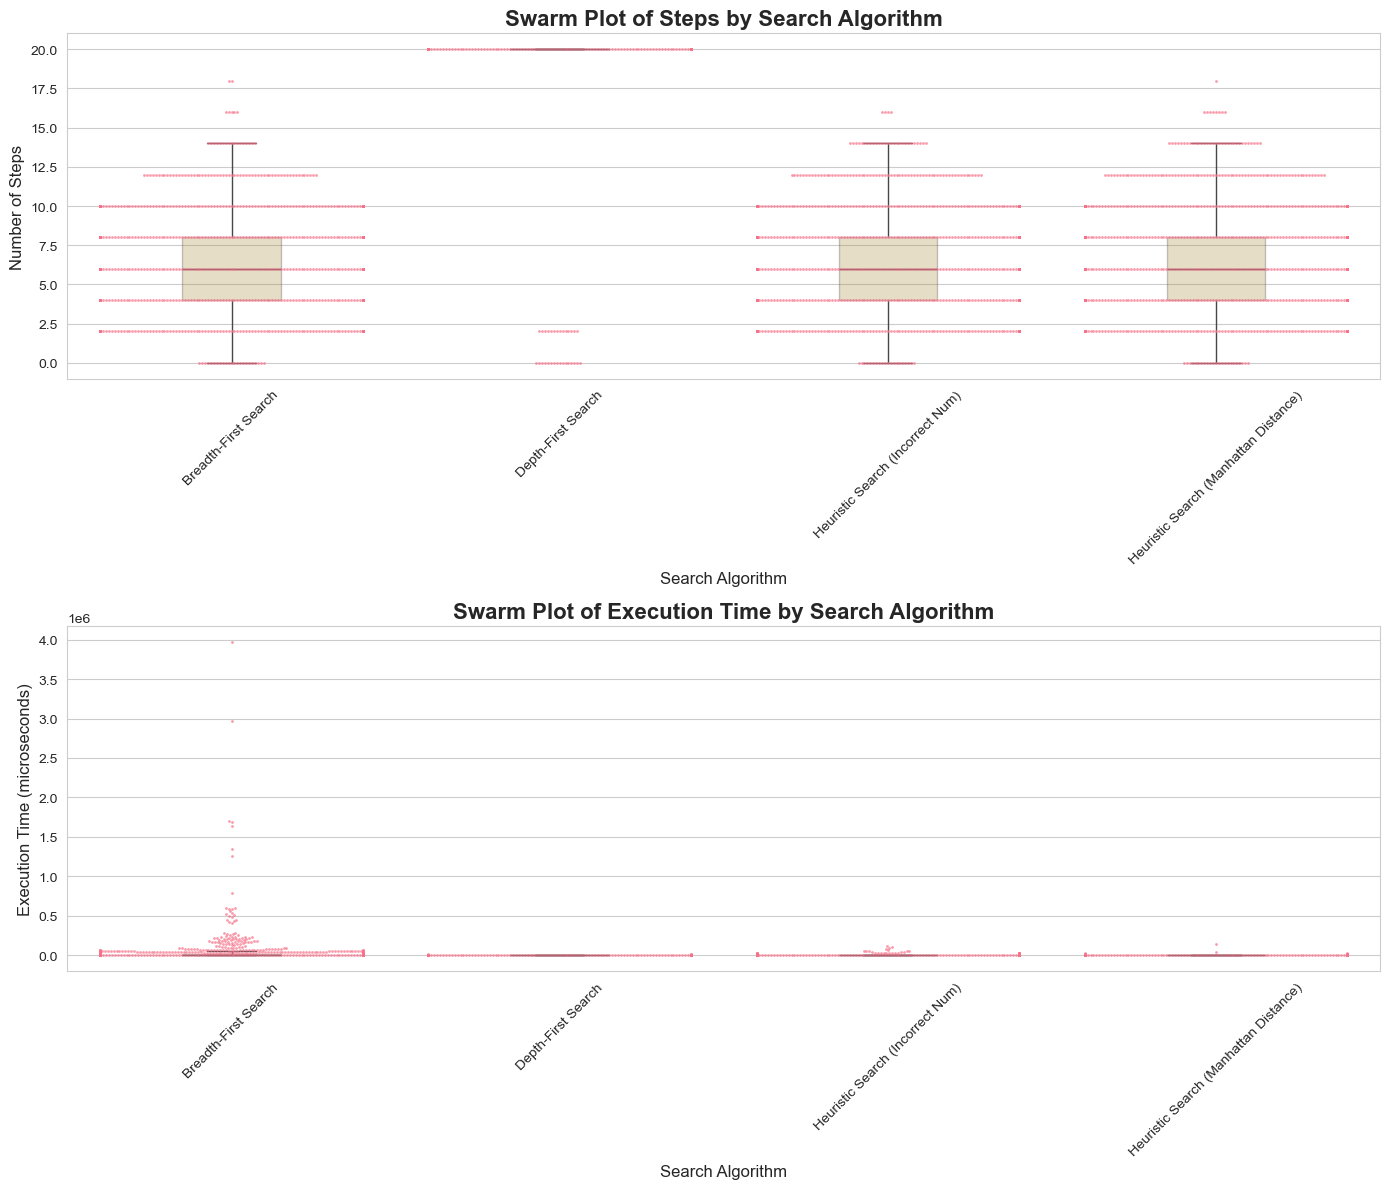

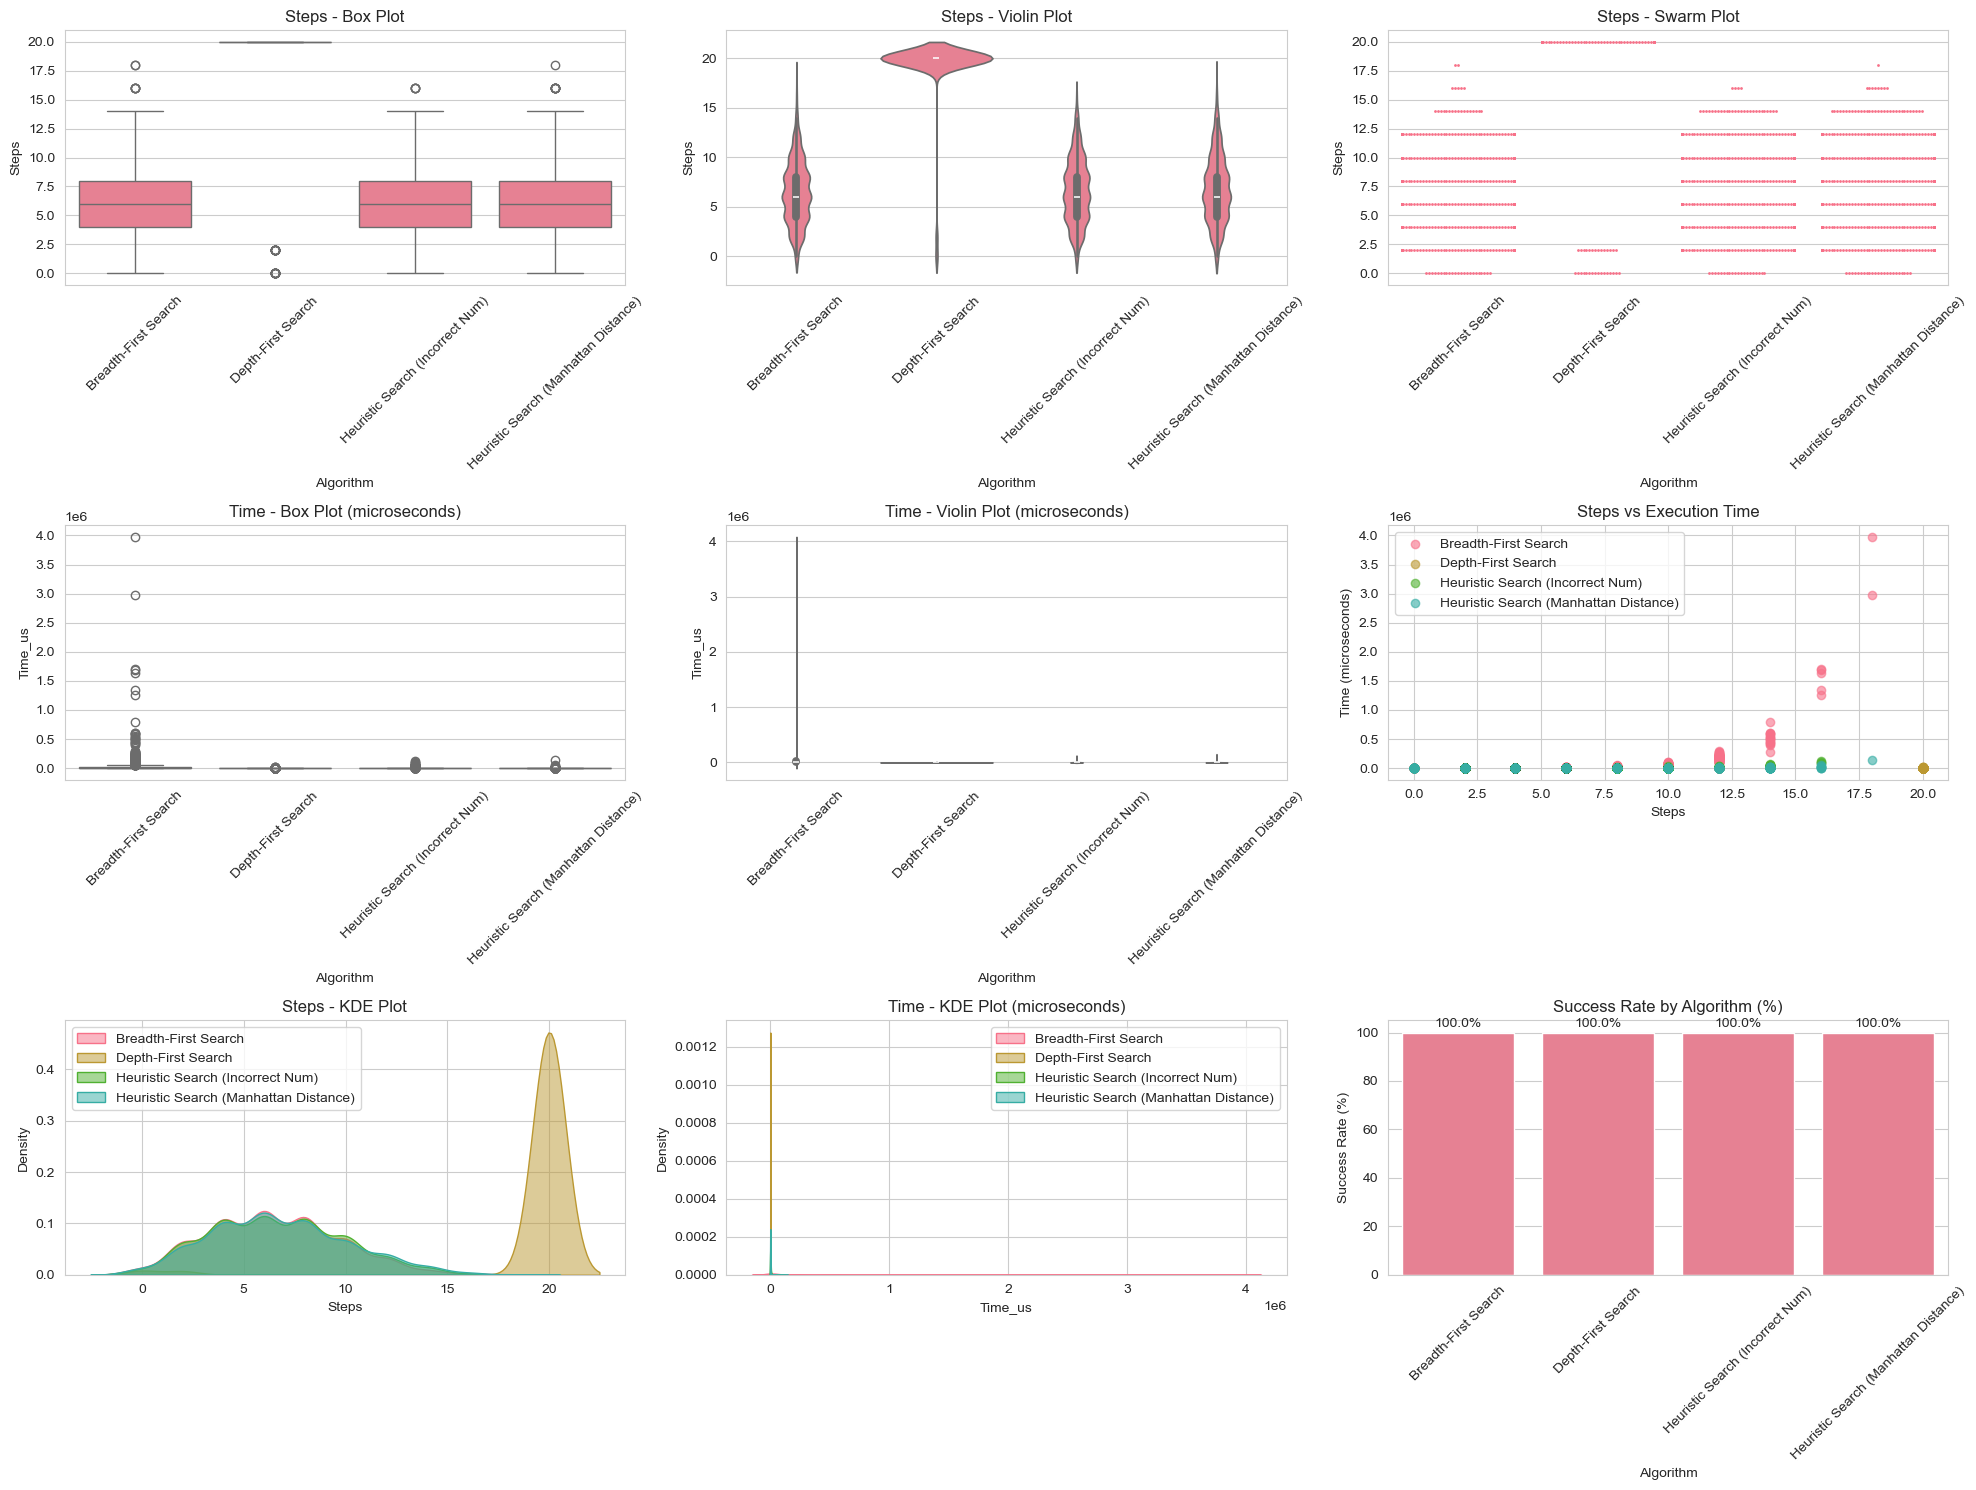


详细统计分析

各算法成功率:
Breadth-First Search: 1000/1000 (100.00%)
Depth-First Search: 1000/1000 (100.00%)
Heuristic Search (Incorrect Num): 1000/1000 (100.00%)
Heuristic Search (Manhattan Distance): 1000/1000 (100.00%)

步数统计 (仅成功案例):
                                        count    mean       std  min   25%  \
Algorithm                                                                    
Breadth-First Search                   1000.0   6.484  3.204999  0.0   4.0   
Depth-First Search                     1000.0  19.428  3.258748  0.0  20.0   
Heuristic Search (Incorrect Num)       1000.0   6.634  3.260165  0.0   4.0   
Heuristic Search (Manhattan Distance)  1000.0   6.758  3.356293  0.0   4.0   

                                        50%   75%   max  
Algorithm                                                
Breadth-First Search                    6.0   8.0  18.0  
Depth-First Search                     20.0  20.0  20.0  
Heuristic Search (Incorrect Num)        6.0   8.0  16.0  
Heuristic Sear

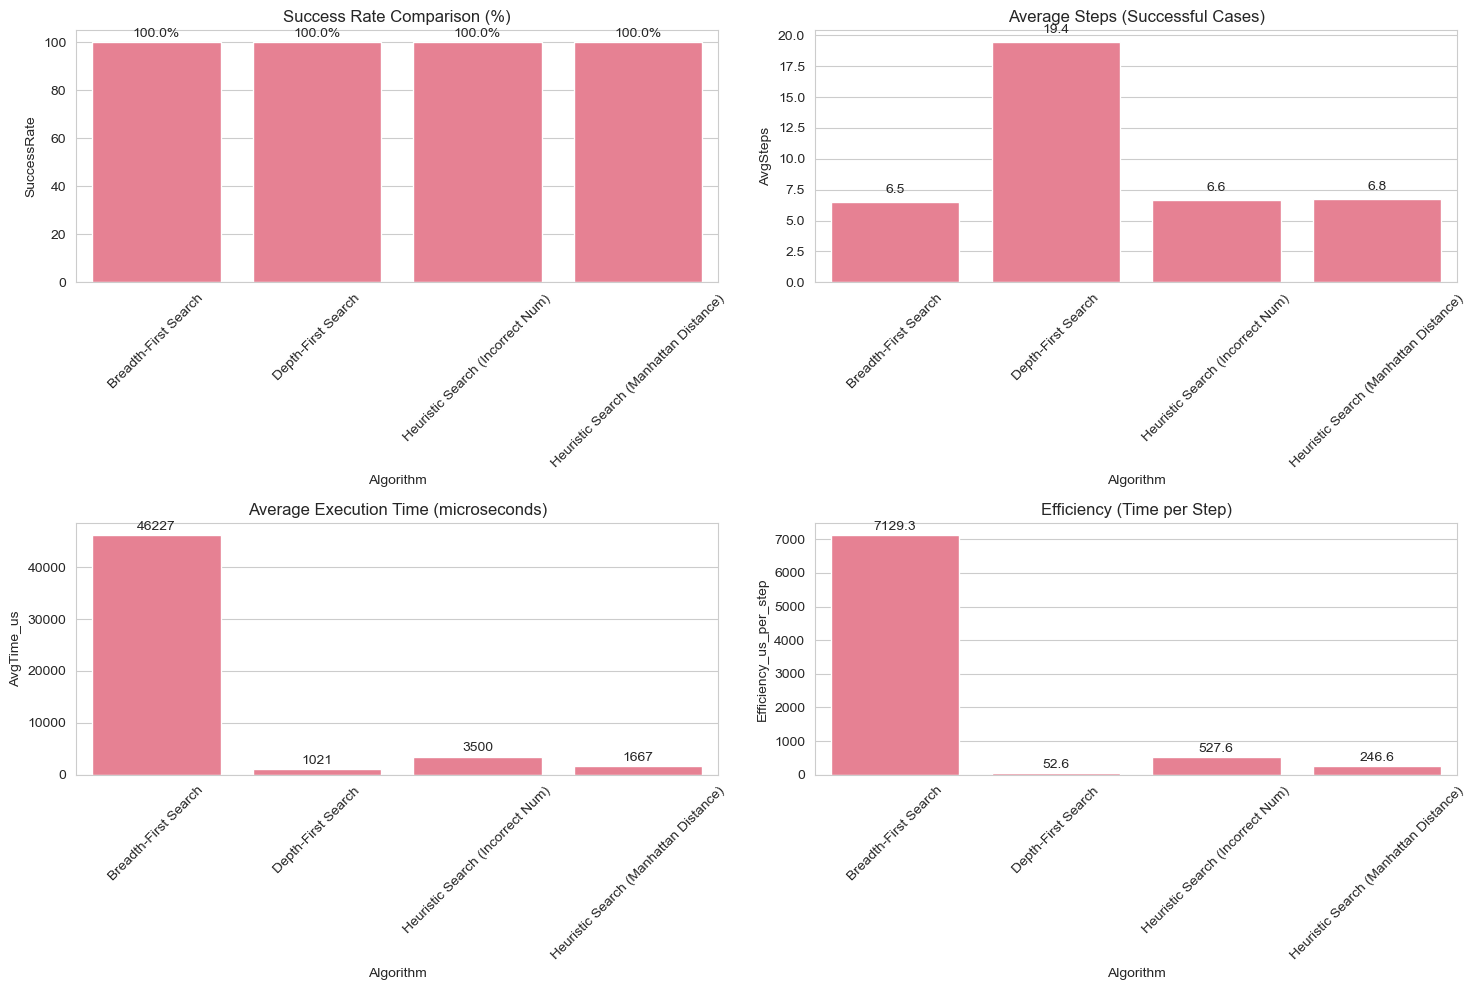


性能指标汇总:
                               Algorithm  SuccessRate  AvgSteps  AvgTime_us  \
0                   Breadth-First Search        100.0      6.48    46226.56   
1                     Depth-First Search        100.0     19.43     1021.42   
2       Heuristic Search (Incorrect Num)        100.0      6.63     3500.40   
3  Heuristic Search (Manhattan Distance)        100.0      6.76     1666.71   

   TimeStd_us  Efficiency_us_per_step  
0   203938.38                 7129.33  
1     1013.62                   52.57  
2     9195.48                  527.65  
3     5434.42                  246.63  


In [7]:
# 使用示例
if __name__ == "__main__":
    file_path = "output.csv"  # 替换为你的文件路径
    
    # 读取并分析数据
    data = plot_swarmplot(file_path)
    
    # 综合比较
    data = comprehensive_comparison(data)
    
    # 性能分析
    metrics = performance_analysis(data)